Pirmiausia importuojamos reikalingos bibliotekos ir perskaitomi failai į dataframes

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
init_notebook_mode(connected=True)

df=pd.read_excel('songs.xlsx')

2 UŽDUOTIS (Tolydinių atributų analizė):

In [152]:
# Apibrėžiamos funkcijos apskaičiuoti trūkstamų reikšmių % ir kvantiliams
def missing_values_perc(series):
    return series.isnull().sum() * 100 / len(series)
def percentile(perc):
    def _(series):
        return series.quantile(perc)
    _.__name__ = 'q_%s' % perc
    return _

In [153]:
df.agg([missing_values_perc])

,artist,song,duration_minutes,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
missing_values_perc,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Kaip galima matyti, duomenų rinkinyje nėra trūkstamų reikšmių. 
Todėl 2-ai ir 3-iai užduotims duomenys failų kopijoje buvo pašalinti rankiniu būdu pagal stulpelį iš loudness, acousticness, tempo ir year stulpelių

In [154]:
df=pd.read_excel('songs_missing.xlsx')

In [155]:

# Suformuojama  lentelė
numeric_attributes = ['duration_minutes','danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo','popularity']
numeric = df.loc[:, numeric_attributes]
numeric = numeric.agg(['count', missing_values_perc, 'nunique', 'min','max', percentile(0.25), percentile(0.75),'mean',percentile(0.5),'std']).T
numeric = numeric.reset_index()
numeric.rename(columns={
    'index':'Atributo pavadinimas',
    'count': 'Kiekis(Eilučių sk.)', 
    'missing_values_perc':'Trūkstamos reikšmės, %', 
    'nunique': 'Kardinalumas', 
    'min': 'Minimali reikšmė', 
    'max': 'Maksimali reikšmė',
    'q_0.25': '1-asis kvartilis',
    'q_0.75': '3-iasis kvartilis',
    'mean': 'Vidurkis',
    'q_0.5': 'Mediana',
    'std': 'Standartinis nuokrypis'
    }, inplace=True)

numeric

,Atributo pavadinimas,Kiekis(Eilučių sk.),"Trūkstamos reikšmės, %",Kardinalumas,Minimali reikšmė,Maksimali reikšmė,1-asis kvartilis,3-iasis kvartilis,Vidurkis,Mediana,Standartinis nuokrypis
0,duration_minutes,2000.0,0.00,1793.0,1.883333,8.0691,3.39300,4.135550,3.812469,3.721325,0.652276
1,danceability,2000.0,0.00,565.0,0.129000,0.9750,0.58100,0.764000,0.667438,0.676000,0.140416
2,energy,2000.0,0.00,580.0,0.054900,0.9990,0.62200,0.839000,0.720366,0.736000,0.152745
3,loudness,1766.0,11.70,1493.0,-20.514000,-0.2760,-6.42875,-4.147000,-5.458708,-5.233000,1.916358
4,speechiness,2000.0,0.00,837.0,0.023200,0.5760,0.03960,0.129000,0.103568,0.059850,0.096159
5,acousticness,1667.0,16.65,1073.0,0.000019,0.9760,0.01330,0.173000,0.127864,0.054100,0.175992
6,instrumentalness,2000.0,0.00,772.0,0.000000,0.9850,0.00000,0.000068,0.015226,0.000000,0.087771
7,liveness,2000.0,0.00,783.0,0.021500,0.8530,0.08810,0.241000,0.181216,0.124000,0.140669
8,valence,2000.0,0.00,760.0,0.038100,0.9730,0.38675,0.730000,0.551690,0.557500,0.220864
9,tempo,1320.0,34.00,1249.0,60.019000,210.8510,97.00625,136.041000,119.179474,118.986000,27.838933


3 UŽDUOTIS (Kategorinių atributų analizė):

In [156]:
# Apibrėžimos funkcijos modų characteristikoms apskaičiuoti
def mode(number):
    def mode_(series):
        return series.value_counts().index[number-1]
    mode_.__name__ = 'mode_%s' % number
    return mode_
def mode_freq(number):
    def _(series):
        return series.value_counts().iloc[number-1]
    _.__name__ = 'mode_freq_%s' % number
    return _
def mode_perc(number):
    def _(series):
        return series.value_counts().iloc[number-1]/series.shape[0]*100
    _.__name__ = 'mode_perc_%s' % number
    return _

# Suformuojama lentelė
categorical_attributes = ['explicit', 'year', 'key', 'mode', 'genre', 'artist', 'song']
categorical = df.loc[:, categorical_attributes]
categorical = categorical.agg(['count',missing_values_perc,'nunique',mode(1),mode_freq(1), mode_perc(1),mode(2),mode_freq(2), mode_perc(2)]).T
categorical = categorical.reset_index()

categorical.rename(columns={
    'index':'Atributo pavadinimas',
    'count': 'Kiekis(Eilučių sk.)', 
    'missing_values_perc':'Trūkstamos reikšmės, %', 
    'nunique': 'Kardinalumas', 
    'mode_1': 'Moda', 
    'mode_freq_1': 'Modos Dažnumas', 
    'mode_perc_1': 'Moda, %',
    'mode_2': '2-oji Moda', 
    'mode_freq_2': '2-osios Modos Dažnumas', 
    'mode_perc_2': '2-oji Moda, %',  
    }, inplace=True)

categorical

,Atributo pavadinimas,Kiekis(Eilučių sk.),"Trūkstamos reikšmės, %",Kardinalumas,Moda,Modos Dažnumas,"Moda, %",2-oji Moda,2-osios Modos Dažnumas,"2-oji Moda, %"
0,explicit,2000,0.0,2,False,1449,72.45,True,551,27.55
1,year,1203.0,39.85,22.0,2001.0,108.0,5.4,2005.0,104.0,5.2
2,key,2000.0,0.0,12.0,1.0,267.0,13.35,11.0,199.0,9.95
3,mode,2000.0,0.0,2.0,1.0,1107.0,55.35,0.0,893.0,44.65
4,genre,2000,0.0,12,pop,936,46.8,hip hop,776,38.8
5,artist,2000,0.0,835,Rihanna,25,1.25,Drake,23,1.15
6,song,2000,0.0,1879,Sorry,5,0.25,Don't,3,0.15


4 UŽDUOTIS (Atributų histogramos): 

Text(0.0, -0.2, 'Normalusis arba bimodalis skirstinys')

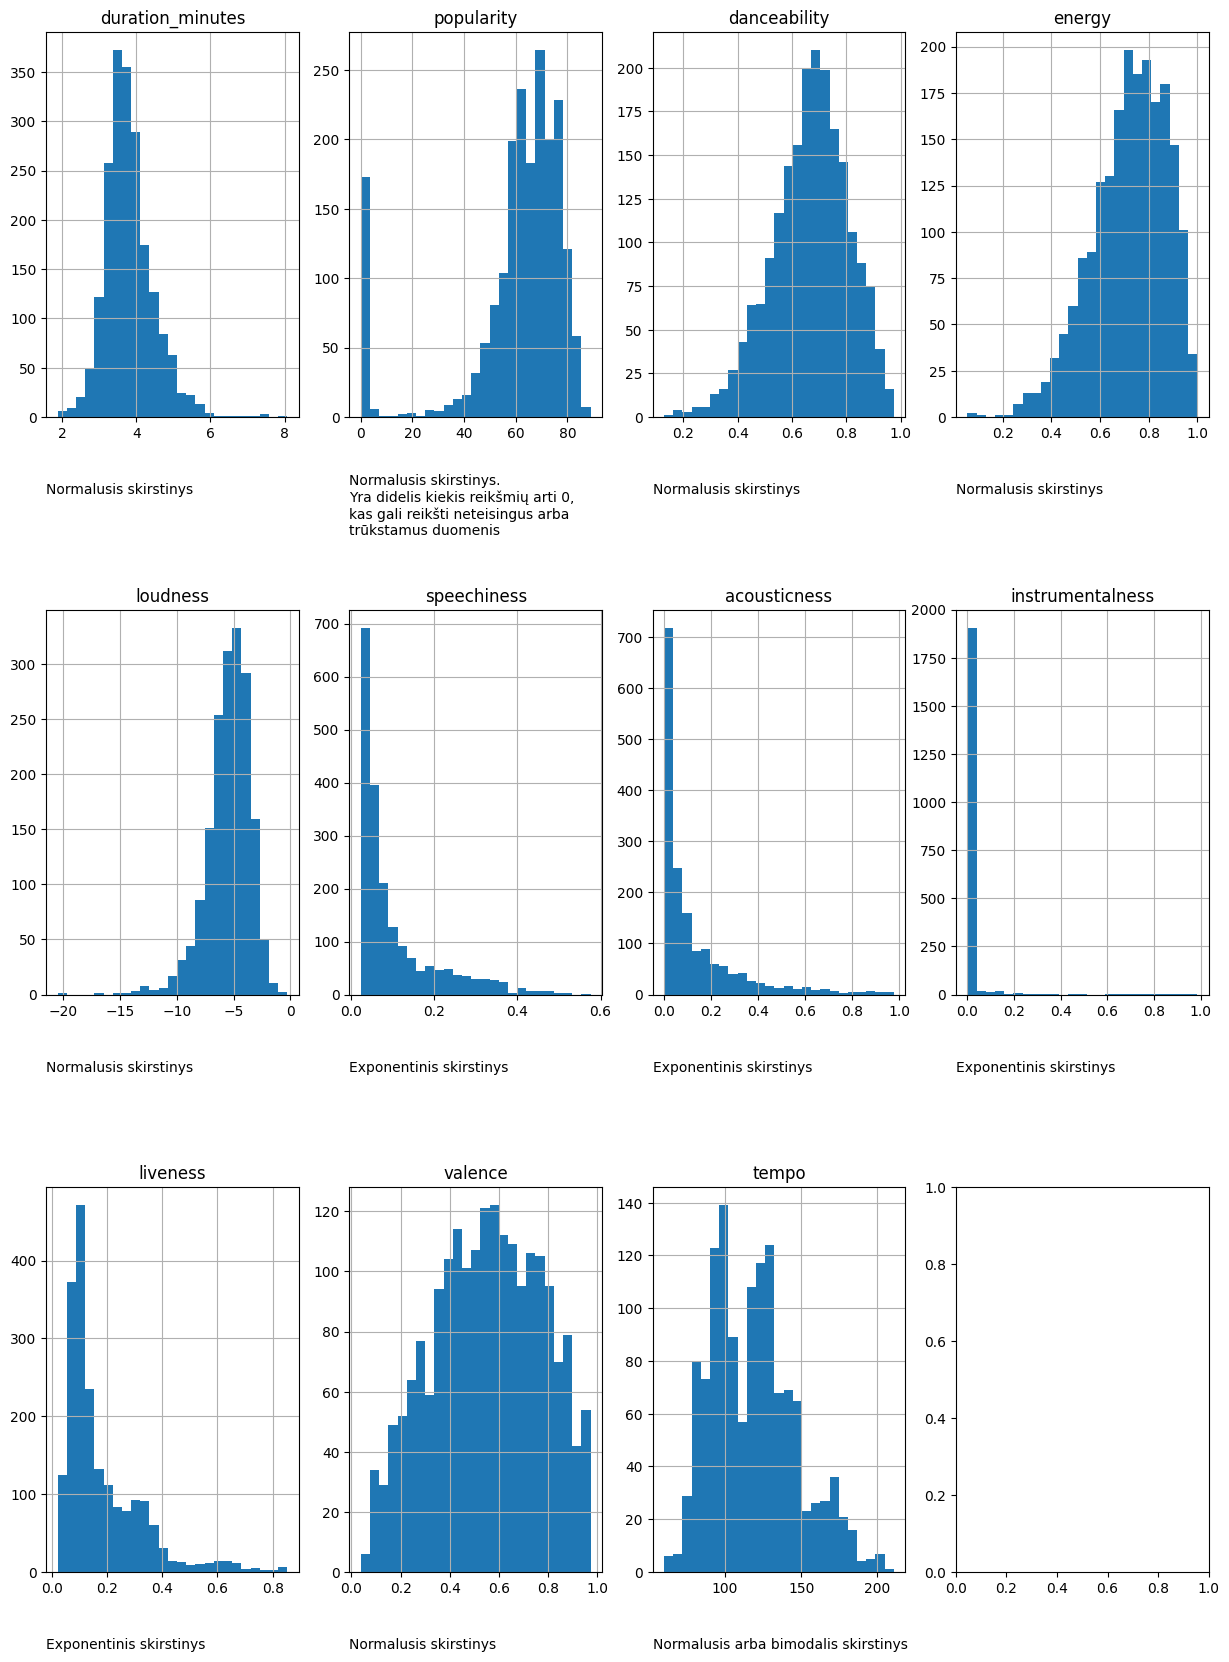

In [157]:
fig, axs = plt.subplots(figsize = (15,20), nrows=3, ncols=4)
plt.subplots_adjust(hspace=0.5)

df['duration_minutes'].hist(ax=axs[0,0],bins=25)
axs[0,0].set_title('duration_minutes')
plt.figtext(0.0, -0.2, "Normalusis skirstinys", wrap=True, fontsize=10, transform=axs[0,0].transAxes)

df['popularity'].hist(ax=axs[0,1],bins=25)
axs[0,1].set_title('popularity')
plt.figtext(0.0, -0.3, "Normalusis skirstinys. \nYra didelis kiekis reikšmių arti 0,\nkas gali reikšti neteisingus arba \ntrūkstamus duomenis", wrap=True, fontsize=10, transform=axs[0,1].transAxes )

df['danceability'].hist(ax=axs[0,2],bins=25)
axs[0,2].set_title('danceability')
plt.figtext(0.0, -0.2, "Normalusis skirstinys", wrap=True, fontsize=10, transform=axs[0,2].transAxes)

df['energy'].hist(ax=axs[0,3],bins=25)
axs[0,3].set_title('energy')
plt.figtext(0.0, -0.2, "Normalusis skirstinys", wrap=True, fontsize=10, transform=axs[0,3].transAxes)



df['loudness'].hist(ax=axs[1,0],bins=25)
axs[1,0].set_title('loudness')
plt.figtext(0.0, -0.2, "Normalusis skirstinys", wrap=True, fontsize=10, transform=axs[1,0].transAxes)

df['speechiness'].hist(ax=axs[1,1],bins=25)
axs[1,1].set_title('speechiness')
plt.figtext(0.0, -0.2, "Exponentinis skirstinys", wrap=True, fontsize=10, transform=axs[1,1].transAxes)

df['acousticness'].hist(ax=axs[1,2],bins=25)
axs[1,2].set_title('acousticness')
plt.figtext(0.0, -0.2, "Exponentinis skirstinys", wrap=True, fontsize=10, transform=axs[1,2].transAxes)

df['instrumentalness'].hist(ax=axs[1,3],bins=25)
axs[1,3].set_title('instrumentalness')
plt.figtext(0.0, -0.2, "Exponentinis skirstinys", wrap=True, fontsize=10, transform=axs[1,3].transAxes)



df['liveness'].hist(ax=axs[2,0],bins=25)
axs[2,0].set_title('liveness')
plt.figtext(0.0, -0.2, "Exponentinis skirstinys", wrap=True, fontsize=10, transform=axs[2,0].transAxes)

df['valence'].hist(ax=axs[2,1],bins=25)
axs[2,1].set_title('valence')
plt.figtext(0.0, -0.2, "Normalusis skirstinys", wrap=True, fontsize=10, transform=axs[2,1].transAxes)

df['tempo'].hist(ax=axs[2,2],bins=25)
axs[2,2].set_title('tempo')
plt.figtext(0.0, -0.2, "Normalusis arba bimodalis skirstinys", wrap=True, fontsize=10, transform=axs[2,2].transAxes)

In [158]:
# 5 UŽDUOTIS (Duomenų kokybės problemų radimas) ir 
# 1) Tikslinio atributo 'popularity' reikšmių nuo 0 iki 10 (labiau pasigilinus nuo 0 iki 1) netikėtai didelė gausa gali reikšti trūkstamą informaciją arba klaidingus duomenis.
# 2) Atributas 'instrumentalness' turi daug outliers. 75% reikšmių yra intervale [0, 0.000068], kai visas intervalas yra [0, 1]


# Patikrinti ekstremalias reiksmes

In [159]:
# 6 UŽDUOTIS (Problemų sprendimo planas):
# 1) Yra 2 galimi sprendimai:
#   a) išmesti eilutes, kurių 'populiarity' reikšmė yra <= 1 
#   b) apmokyti modelį su tų eilučių pašalinimu ir be. Tada žiūrėti kuris modelis yra tikslesnis
#   c) Kaip bus matyti iš toliau esančių barplotų, duomenyse yra nemažai išskirčių
# 2) Yra 2 galimi sprendimai:
#   a) nenaudoti šio parametro modelio kūrime
#   b) sukūrus modelį papildomai patikrinti kokią įtaką šis atributas daro tikslumui
#   c) kiekviename stulpelyje pakeisti mažesnes vertes už 1st percentile ir didesnes vertes už 99th percentile 1st percentile ir 99th percentile vertėmis atitinkamai

7 UŽDUOTIS (Sąryšių tarp atributų nustatymas):

Atributų pavyzdžiai tarp kurių yra priklausomybės:

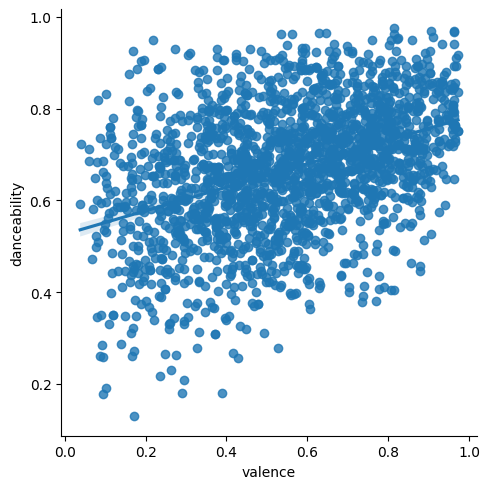

In [160]:
sns.lmplot(x="valence", y="danceability", data=df)

Tarp 'valence' ir 'danceability' parametrų yra tiesioginė priklausomybė, kurios stiprumas yra 0.4

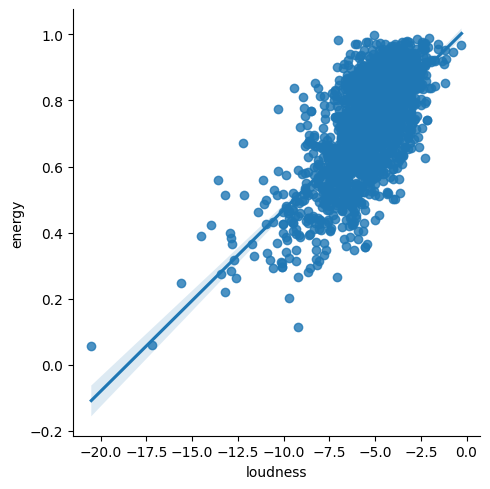

In [161]:
sns.lmplot(x="loudness", y="energy", data=df)

Tarp 'loudness' ir 'energy' parametrų yra tiesioginė priklausomybė, kurios stiprumas yra 0.69

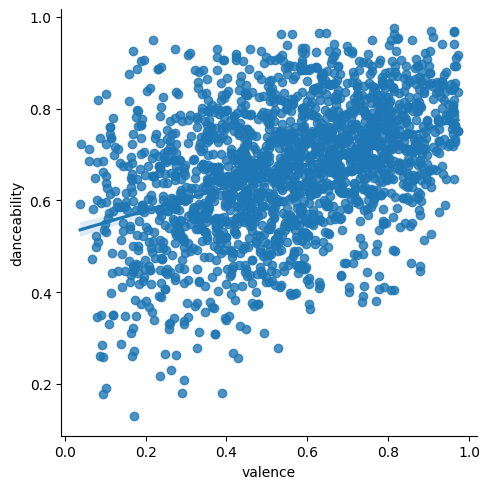

In [162]:
sns.lmplot(x="valence", y="danceability", data=df)

Tarp 'year' ir 'duration_minutes' parametrų yra atvirkštinė priklausomybė, kurios stiprumas yra -0,32

Atributų pavyzdžiai tarp kurių nėra priklausomybių:

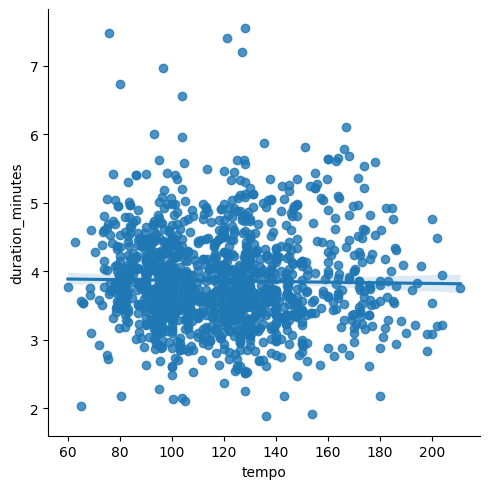

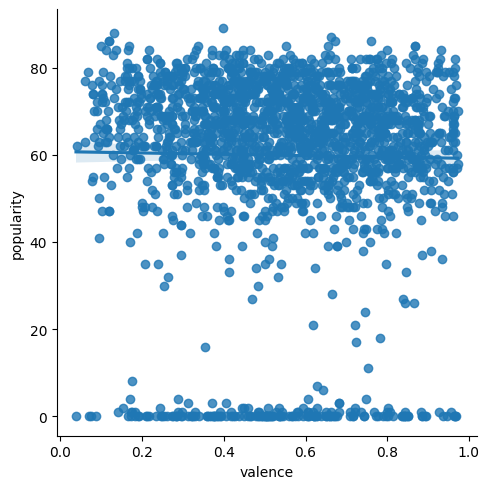

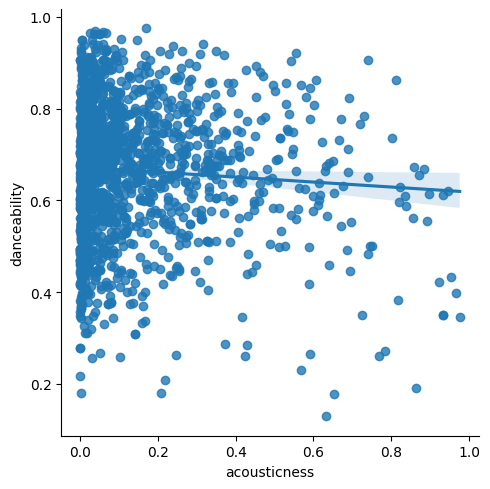

In [163]:
sns.lmplot(x="tempo", y="duration_minutes", data=df)
sns.lmplot(x="valence", y="popularity", data=df)
sns.lmplot(x="acousticness", y="danceability", data=df)

Scatter Plot Matrix (SPLOM):

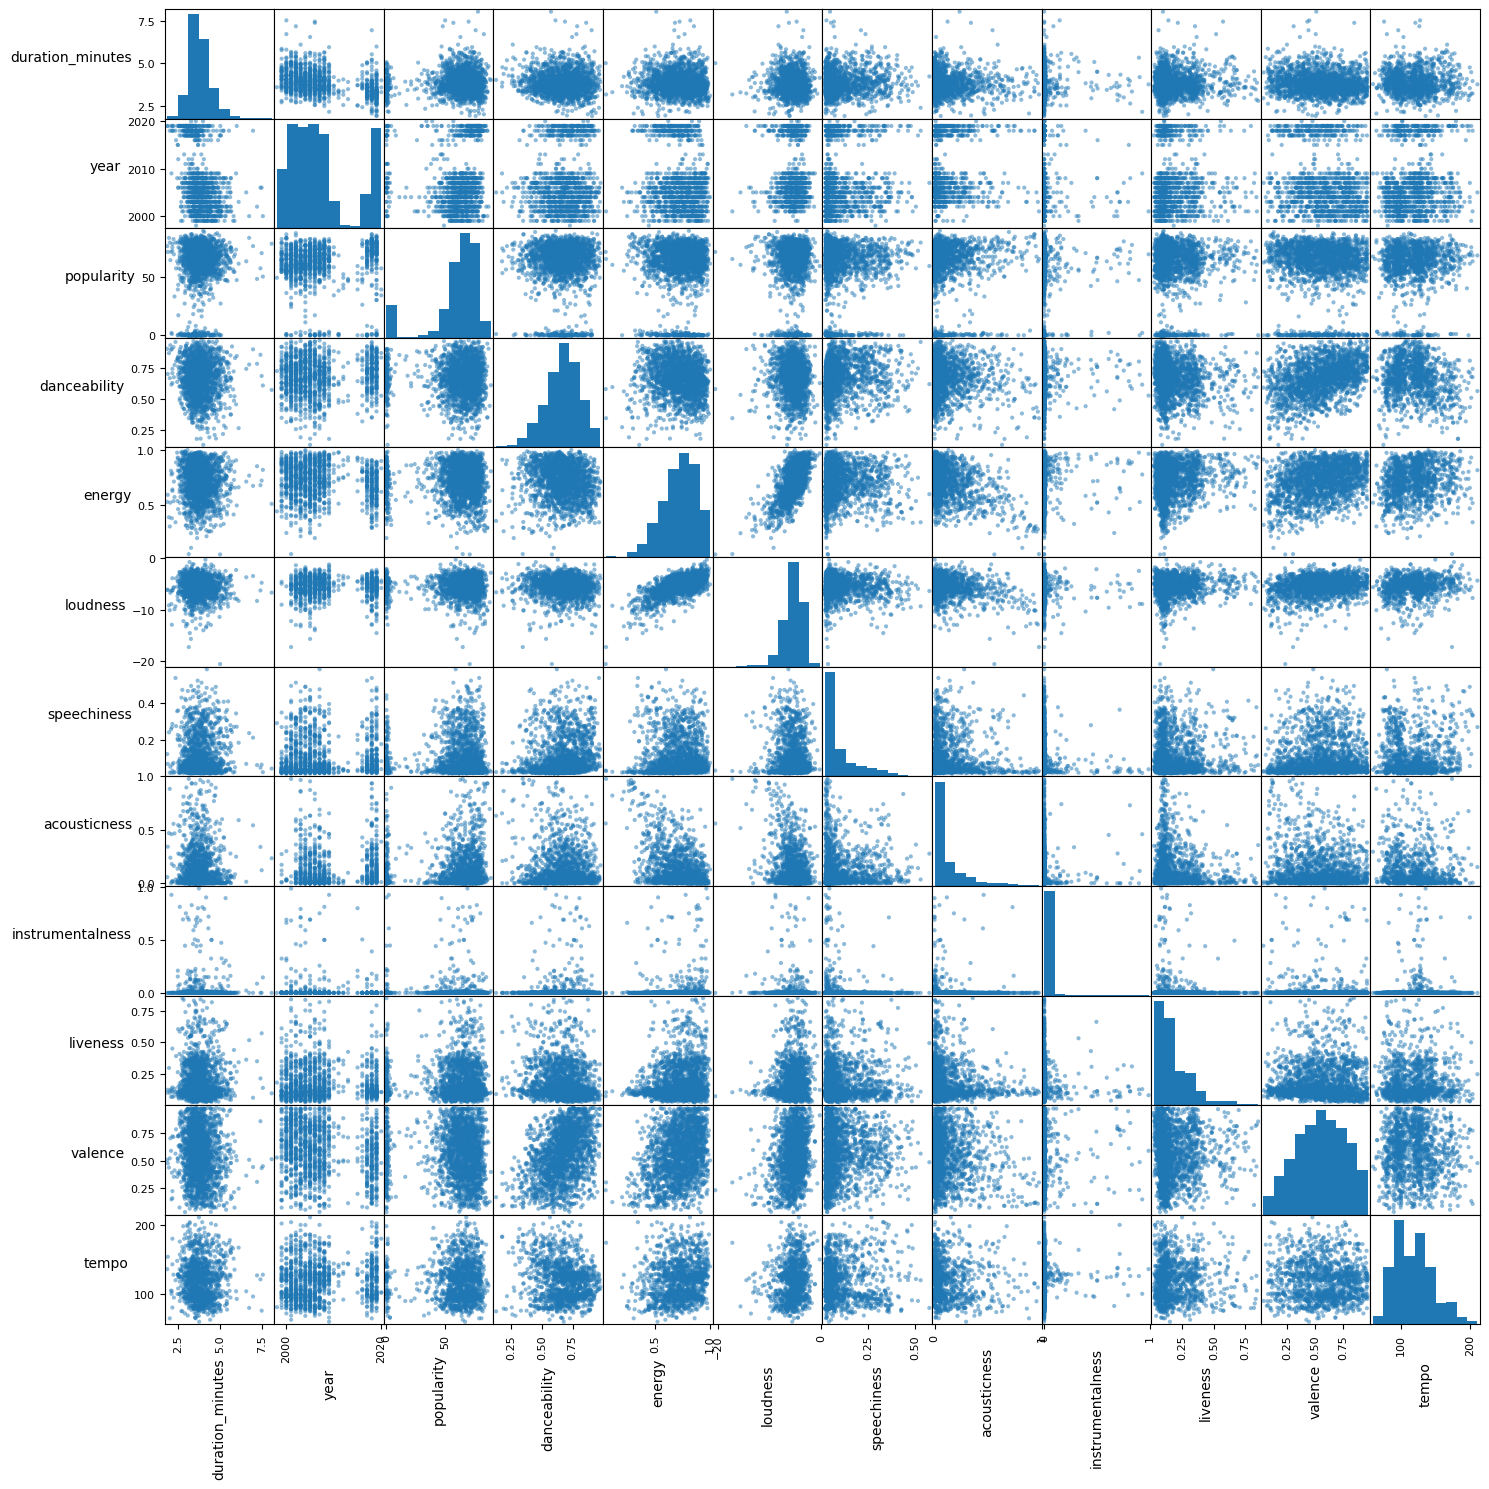

In [164]:
from pandas.plotting import scatter_matrix
axes = scatter_matrix(df.select_dtypes(include=[np.number]).drop(['mode', 'key'], axis=1), figsize=(15,15), diagonal='hist')
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()

<AxesSubplot:xlabel='year', ylabel='explicit'>

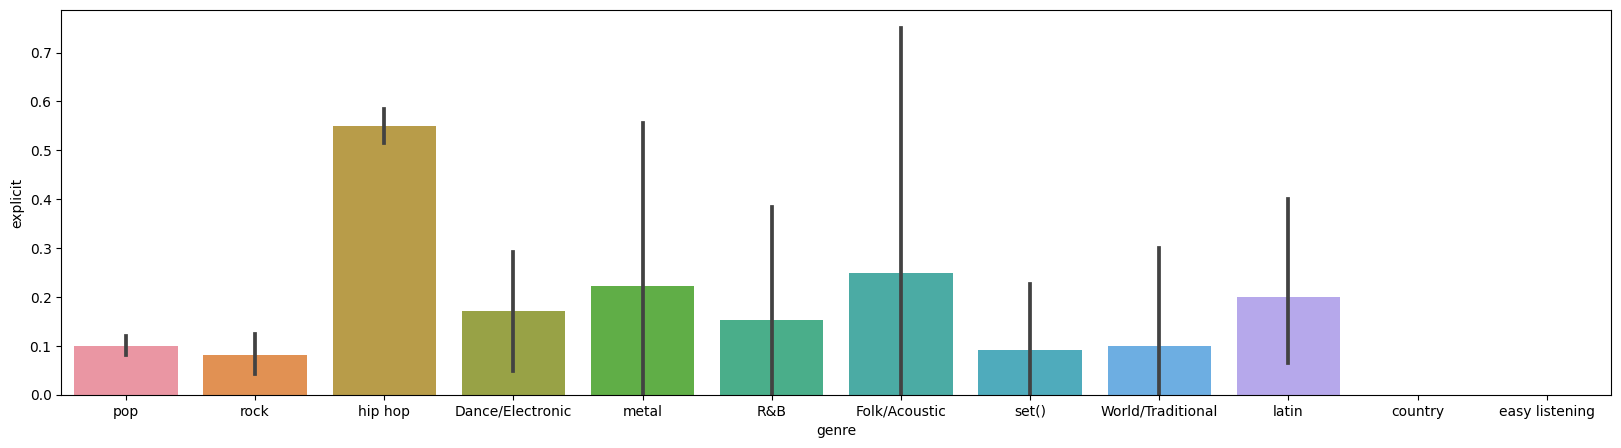

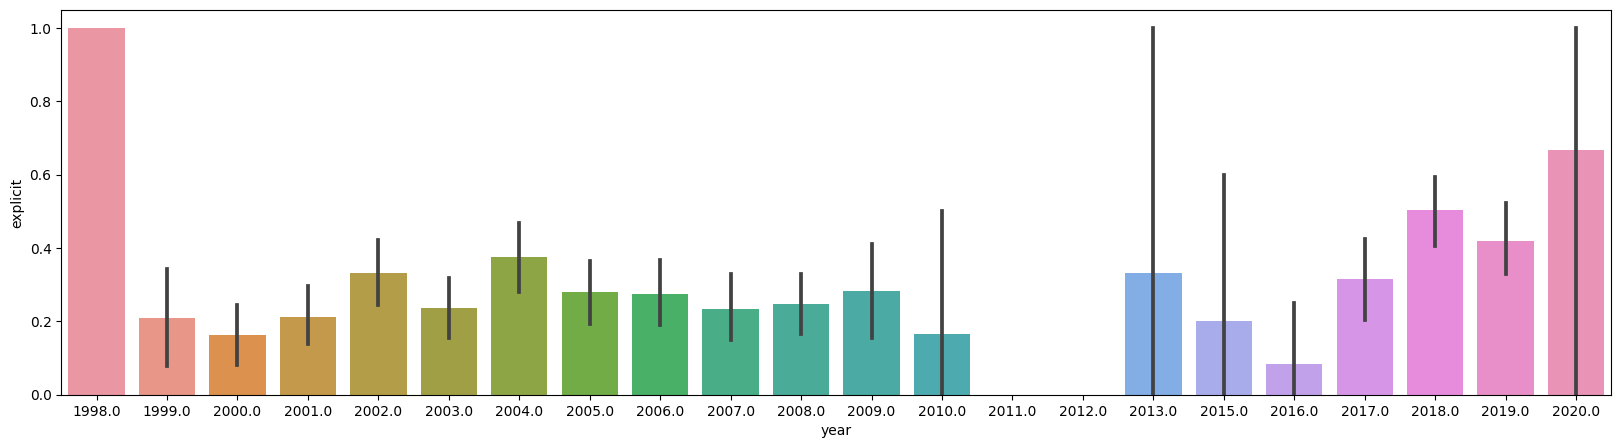

In [165]:
categorical_attributes = ['explicit', 'year', 'key', 'mode', 'genre', 'artist', 'song']

fig = plt.figure(figsize = (20,5))
ax = fig.gca()
sns.barplot(x=df.genre, y=df.explicit, ax=ax)

fig = plt.figure(figsize = (20,5))
ax = fig.gca()
sns.barplot(x=df.year, y=df.explicit, ax=ax)

In [166]:
# Iš 'genre' ir 'explicit' barplot galima matyti, kad 'hip hop' žanro muzikoje dažniausiai pasitaiko necenzūrinių žodžių
# Iš 'explicit' ir 'year' barplot galima matyti, kad daugiausiai dainų su necenzūriniais žodžiai buvo sukurta 2018 metais

Histogramų tarp kategorinių ir tolydinių kintamųjų pavyzdžiai:

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

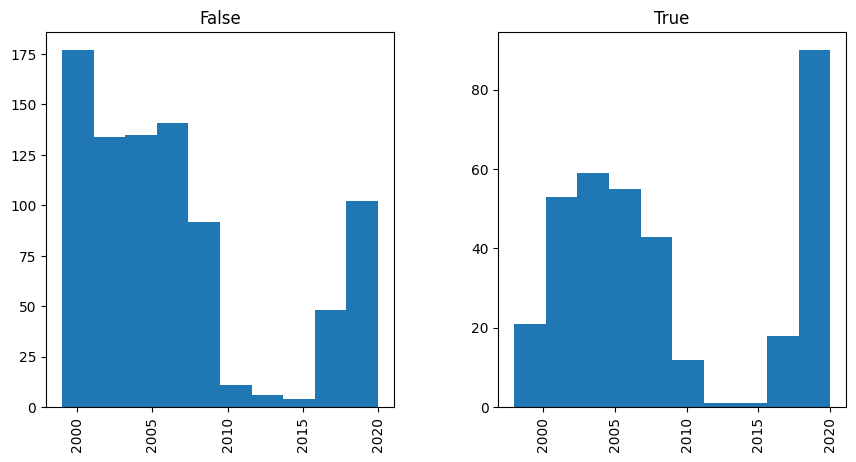

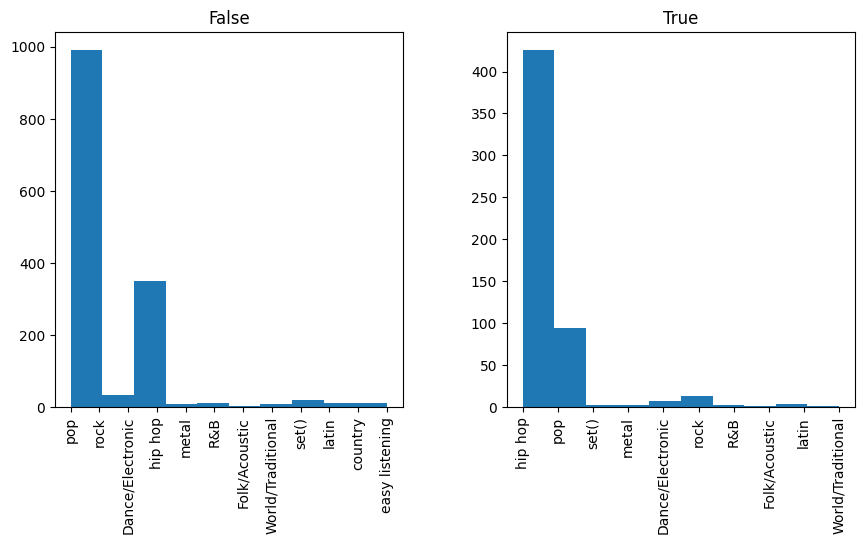

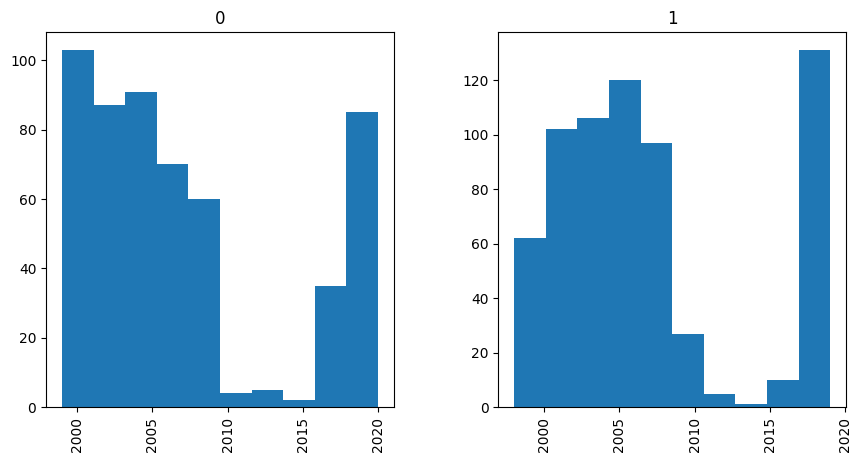

In [167]:
fig = plt.figure(figsize = (10,5))
ax = fig.gca()
df.year.hist(by=df['explicit'], ax=ax)

fig = plt.figure(figsize = (10,5))
ax = fig.gca()
df.genre.hist(by=df['explicit'], ax=ax)

fig = plt.figure(figsize = (10, 5))
ax = fig.gca()
df.year.hist(by=df['mode'], ax=ax)

Boxplots tarp kategorinių ir tolydinių kintamųjų pavyzdžiai:

<AxesSubplot:xlabel='year', ylabel='duration_minutes'>

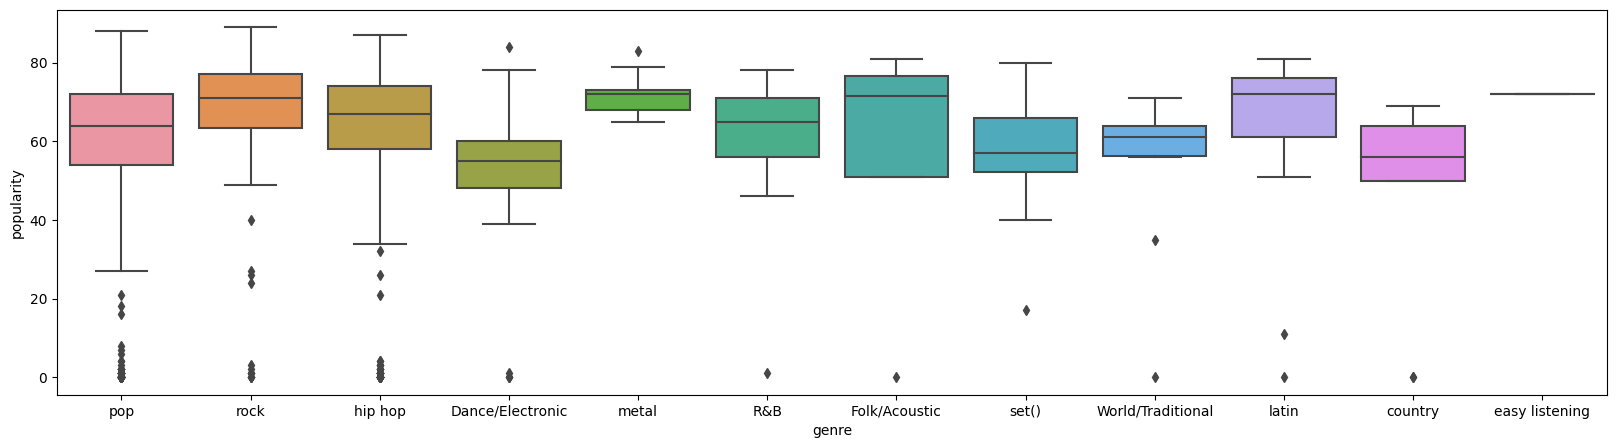

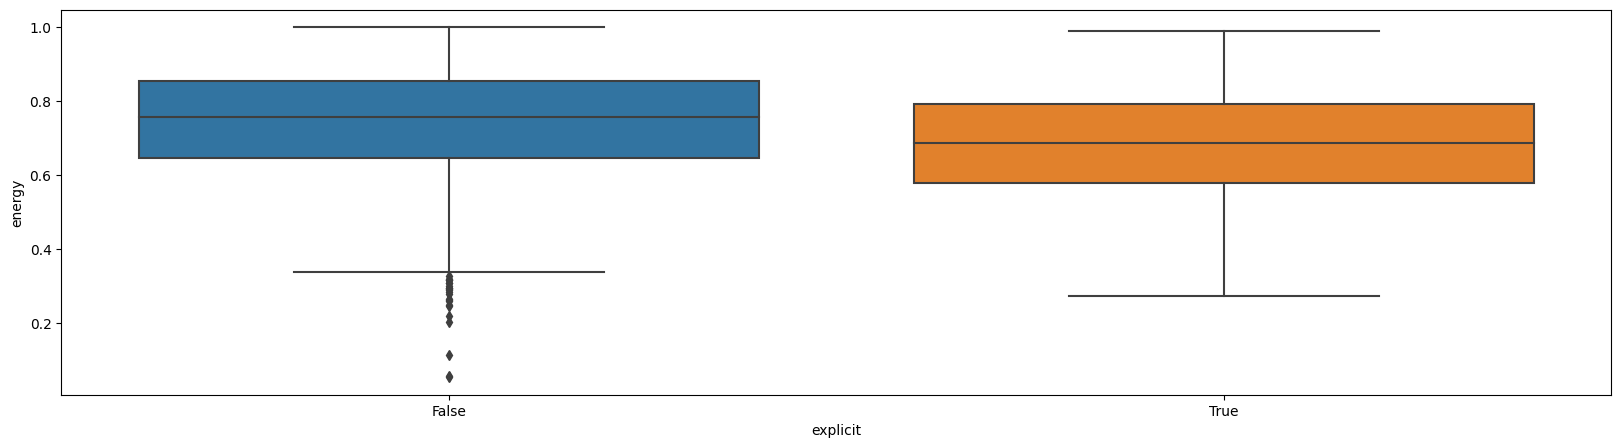

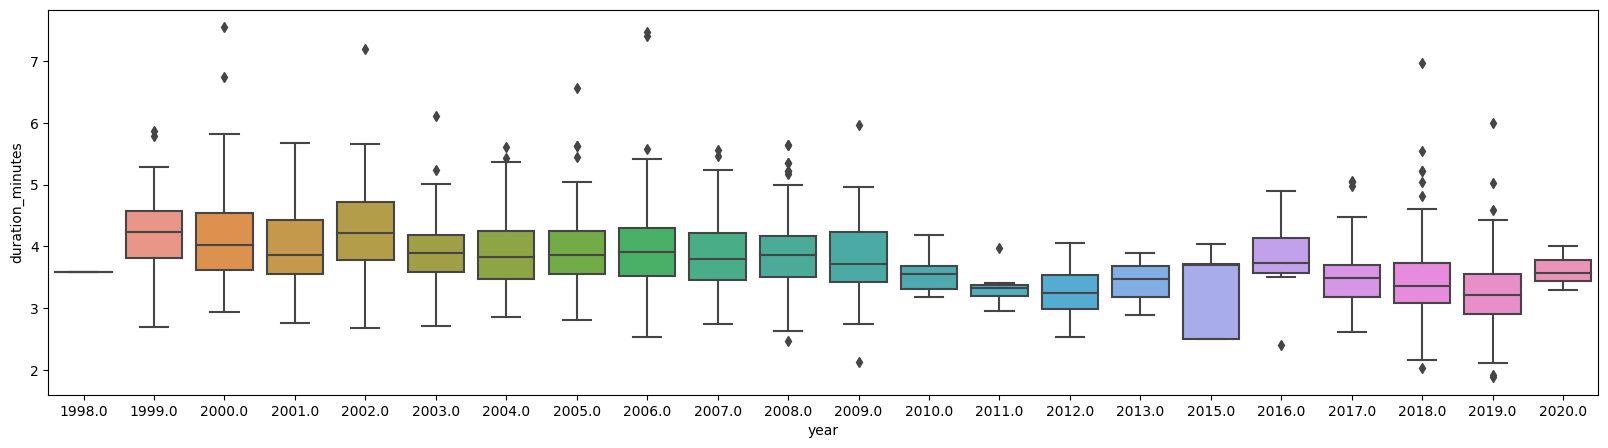

In [168]:
numeric_attributes = ['duration_minutes','danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo','popularity']
categorical_attributes = ['explicit', 'year', 'key', 'mode', 'genre', 'artist', 'song']

fig = plt.figure(figsize = (20,5))
ax = fig.gca()
sns.boxplot(x=df.genre, y=df.popularity, ax=ax)

fig = plt.figure(figsize = (20,5))
ax = fig.gca()
sns.boxplot(x=df.explicit, y=df.energy, ax=ax)

fig = plt.figure(figsize = (20,5))
ax = fig.gca()
sns.boxplot(x=df.year, y=df.duration_minutes, ax=ax)

8 UŽDUOTIS (Kovariacijos ir Koreliacijos reikšmės + koreliacijos matrica)

In [169]:
# Kovariacijos reikšmės
cov = df.drop(['explicit', 'year', 'key', 'mode', 'genre', 'artist', 'song'], axis=1).cov()
cov

,duration_minutes,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
duration_minutes,0.425464,0.704424,-0.005501,-0.007847,-0.069983,0.004202,0.001508,-0.000241,0.002288,-0.016837,-0.355404
popularity,0.704424,455.206847,-0.010623,-0.045694,0.825563,0.043417,0.125206,-0.089998,-0.029580,-0.076066,24.249975
danceability,-0.005501,-0.010623,0.019717,-0.002231,-0.014462,0.001966,-0.001678,0.000286,-0.002497,0.012504,-0.735704
energy,-0.007847,-0.045694,-0.002231,0.023331,0.201813,-0.000837,-0.012153,0.000508,0.003368,0.011284,0.662817
loudness,-0.069983,0.825563,-0.014462,0.201813,3.672428,-0.017867,-0.109177,-0.009939,0.023588,0.109332,7.177940
speechiness,0.004202,0.043417,0.001966,-0.000837,-0.017867,0.009247,0.000051,-0.000531,0.000827,0.001563,0.058526
acousticness,0.001508,0.125206,-0.001678,-0.012153,-0.109177,0.000051,0.030973,-0.000087,-0.002656,-0.005444,-0.373758
instrumentalness,-0.000241,-0.089998,0.000286,0.000508,-0.009939,-0.000531,-0.000087,0.007704,-0.000431,-0.000294,0.118240
liveness,0.002288,-0.029580,-0.002497,0.003368,0.023588,0.000827,-0.002656,-0.000431,0.019788,0.000592,0.019322
valence,-0.016837,-0.076066,0.012504,0.011284,0.109332,0.001563,-0.005444,-0.000294,0.000592,0.048781,-0.243199


<AxesSubplot:>

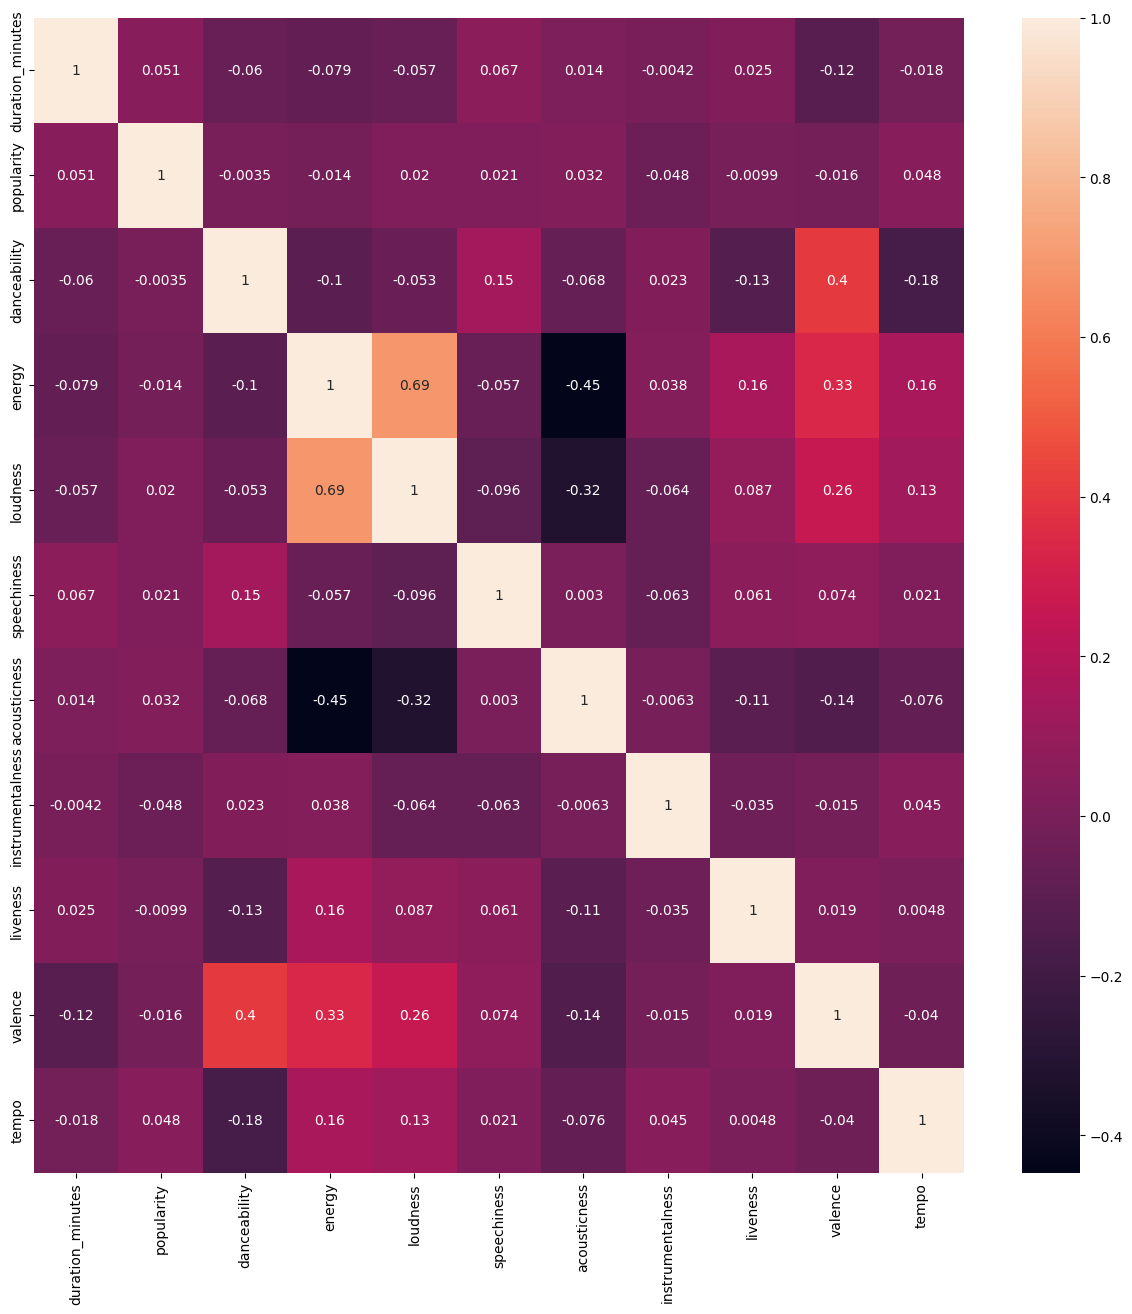

In [170]:
# Koreliacijos reikšmės ir koreliacijos matrica
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
corr = df.drop(['explicit', 'year', 'key', 'mode', 'genre', 'artist', 'song'], axis=1).corr()
sns.heatmap(corr, annot=True, ax=ax)

Galima matyti, kad stipriausi ryšiai yra tarp 'loudness' ir 'energy', 'valence' ir 'danceability', 'acousticness' ir 'energy'

In [171]:
df.head()

,artist,song,duration_minutes,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,3.519333,False,2000.0,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,2.784433,False,1999.0,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,rock
2,Faith Hill,Breathe,4.175767,False,1999.0,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,pop
3,Bon Jovi,It's My Life,3.741550,False,2000.0,78,0.551,0.913,0,NaN,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,rock
4,*NSYNC,Bye Bye Bye,3.342667,False,2000.0,65,0.614,0.928,8,NaN,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [172]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from scipy.stats.mstats import winsorize

class ExtremeValuesHandler(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_copy = winsorize(X, limits=[0.01, 0.01])
        return X_copy

class HeadPrinter(BaseEstimator, TransformerMixin):
    def __init__(self, comment):
        self.comment = comment
        self.cats = ['duration_minutes', 'year', 'danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
                           'genre_1','genre_2','genre_3','genre_4','genre_5','genre_6','genre_7','genre_8','genre_9','genre_10','genre_11','genre_12','explicit_false', 'explicit_true']
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X_copy = pd.DataFrame(X.copy(), columns=self.cats)
        print(self.comment)
        print(X_copy.head())
        return X

In [173]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

numeric_attributes = ['duration_minutes', 'year', 'danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
categorical_attributes = ['genre', 'explicit']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy="mean"))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy="most_frequent")),
    ('encoder', OneHotEncoder())
])

preprocessor = ColumnTransformer(transformers=[
    ('numeric', numeric_transformer, numeric_attributes),
    ('onehot', categorical_transformer, categorical_attributes)
])

xgb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('printer2', HeadPrinter("After converting categorical columns into numerical:")),
    ('extremes', ExtremeValuesHandler()),
    ('printer3', HeadPrinter("After handling extremes:")),
    ('scaler',  MinMaxScaler(feature_range=(0, 1))),
    ('printer4', HeadPrinter("After scaling:")),
    ('model', XGBRegressor())
])

# Eilučių su popularity reikšmėmis <= 1 pašalinimas sumažina modelio vidutinę absoliutinę paklaidą nuo 15.51 iki 8.27
df = df[df.popularity > 1]

X = df.drop(['popularity'], axis=1)
y = df.popularity

X_train, X_valid, y_train, y_valid = train_test_split(X,y, train_size=0.8, test_size=0.2, random_state=0)

regressor = xgb.fit(X_train, y_train)

After converting categorical columns into numerical:
   duration_minutes         year  danceability  energy   key  loudness  \
0          3.930000  2004.000000         0.629   0.532   5.0    -7.880   
1          3.698883  2007.000000         0.736   0.740   0.0    -2.180   
2          4.679283  2007.203024         0.383   0.430  10.0    -8.644   
3          3.980667  2004.000000         0.734   0.668   0.0    -3.935   
4          3.748883  2003.000000         0.680   0.847  11.0    -6.636   

   speechiness  acousticness  instrumentalness  liveness  valence       tempo  \
0       0.0352      0.331000          0.000000    0.2380    0.619   90.098000   
1       0.0786      0.515000          0.000000    0.0468    0.803  140.141000   
2       0.0302      0.817000          0.000001    0.0869    0.174  118.569208   
3       0.0349      0.130338          0.000000    0.0925    0.651   99.971000   
4       0.1080      0.021700          0.000000    0.0374    0.750  176.051000   

   genre_1  gen

In [174]:
predictions = regressor.predict(X_valid)
print(mean_absolute_error(y_valid, predictions))

After converting categorical columns into numerical:
   duration_minutes         year  danceability  energy  key   loudness  \
0          3.335067  2007.203024         0.698   0.882  4.0  -3.078000   
1          3.797767  2000.000000         0.800   0.922  4.0  -5.474616   
2          2.822550  2018.000000         0.652   0.557  1.0  -5.714000   
3          3.615550  2007.203024         0.624   0.723  1.0  -6.782000   
4          3.365333  2003.000000         0.553   0.775  1.0 -10.284000   

   speechiness  acousticness  instrumentalness  liveness  valence       tempo  \
0       0.0863      0.127000          0.000000    0.1500    0.445  118.569208   
1       0.2400      0.130338          0.000009    0.0352    0.801   98.631000   
2       0.0318      0.740000          0.000000    0.1240    0.483  150.073000   
3       0.3780      0.172000          0.000000    0.4830    0.757   84.789000   
4       0.0430      0.212000          0.000000    0.0728    0.510  139.993000   

   genre_1  gen